In [1]:
#adicionar 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score



In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import requests
import io

In [4]:
import os

cwd = os.getcwd() 
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\lanur\\AppData\\Local\\Programs\\Microsoft VS Code': ['bin', 'chrome_100_percent.pak', 'chrome_200_percent.pak', 'Code.exe', 'Code.VisualElementsManifest.xml', 'd3dcompiler_47.dll', 'ffmpeg.dll', 'icudtl.dat', 'libEGL.dll', 'libGLESv2.dll', 'locales', 'policies', 'resources', 'resources.pak', 'snapshot_blob.bin', 'tools', 'unins000.dat', 'unins000.exe', 'unins000.msg', 'v8_context_snapshot.bin', 'vk_swiftshader.dll', 'vk_swiftshader_icd.json', 'vulkan-1.dll']


In [143]:
url = 'https://raw.githubusercontent.com/catarinatomasr/projectoEDSB/main/HR_DS.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
data = df
#df = pd.read_csv('https://github.com/catarinatomasr/projectoEDSB/blob/main/HR_DS.csv')

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
pd.set_option('display.max_columns', 40)
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Definir perguntas para responder
Story 

Data Preparation/Clean

In [8]:
data.describe()
#Checking the Null Values
pd.set_option('display.max_rows', 200)
#data.isnull().sum() #no null values
#data.info()

#check for  duplicate records and have the unique records to be included into your dataset:
#data[data.duplicated()] #zero duplicated

In [9]:
#Over18 : ['Y']
#Y    1470
#so tem um unico valor, por isso vou apagar por ser inutil
#data['StandardHours'].unique() tambem so tem 1 valor, que é sempre 80
#data['EmployeeCount'].unique() tambem so tem 1 valor, que é 1

#não trazem valor 

data=data.drop('Over18', axis=1)
data=data.drop('StandardHours', axis=1)
data=data.drop('EmployeeCount', axis=1)

In [10]:
#ver os data types e ver os seus valores unicos

for column in data.columns:
    if data[column].dtype==object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print('_______________________________________________________________')


Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_______________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_______________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_______________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_______________________________________________________________
Gender : ['Fema

In [109]:
#transformar as colunas que não sao numericas, em numericas pois os modelos n aceitam colunas texto
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
    if data[column].dtype == np.int64:
            continue
    data[column]=LabelEncoder().fit_transform(data[column])

In [12]:
turnover_Summary = data.groupby('Attrition')
turnover_Summary.mean()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,1.607461,812.504461,1.245742,8.915653,2.927007,2.231955,1027.656123,2.771290,0.593674,65.952149,2.770479,2.145985,4.386050,2.778589,1.045418,6832.739659,14265.779400,2.645580,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,1.607595,750.362869,1.337553,10.632911,2.839662,2.329114,1010.345992,2.464135,0.632911,65.573840,2.518987,1.637131,4.835443,2.468354,1.367089,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


Analise descritiva dos dados-Gráficos


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

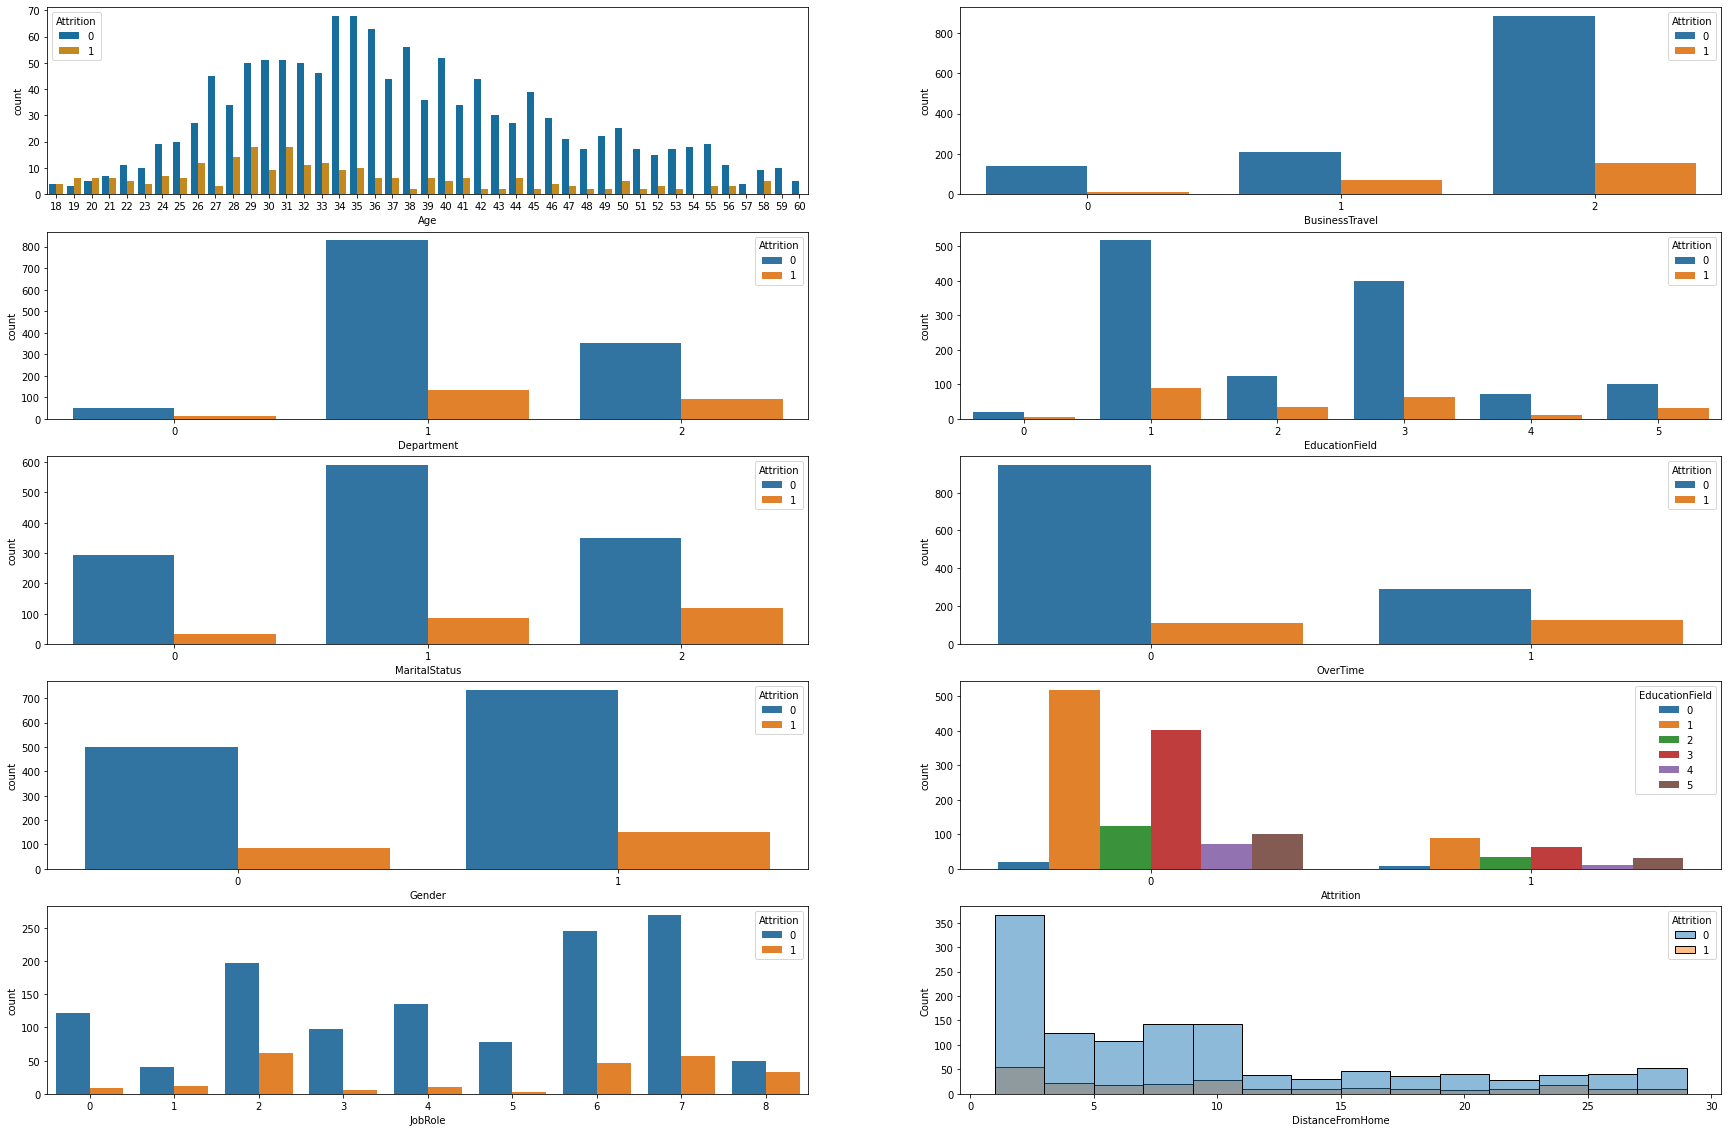

In [14]:
#Attrition em função das variaveis categoricas
fig, axes = plt.subplots(5,2, figsize = (30,20))
sns.countplot(ax = axes[0,0], data = data, x = 'Age', hue='Attrition',palette='colorblind')
sns.countplot(ax = axes[0,1],hue=data.Attrition, x=data.BusinessTravel)
sns.countplot(ax = axes[1,0],hue=data.Attrition, x=data.Department)
sns.countplot(ax = axes[1,1],hue=data.Attrition, x=data.EducationField)
sns.countplot(ax = axes[2,0],hue=data.Attrition, x=data.MaritalStatus)
sns.countplot(ax = axes[2,1],hue=data.Attrition, x=data.OverTime)
sns.countplot(ax = axes[3,0],hue=data.Attrition, x=data.Gender)
sns.countplot(ax = axes[3,1],x=data.Attrition, hue=data.EducationField)
sns.countplot(ax = axes[4,0],x='JobRole', hue='Attrition', data=data)
sns.histplot(ax = axes[4,1],hue=data.Attrition, x=data.DistanceFromHome)


<AxesSubplot:xlabel='Age', ylabel='count'>

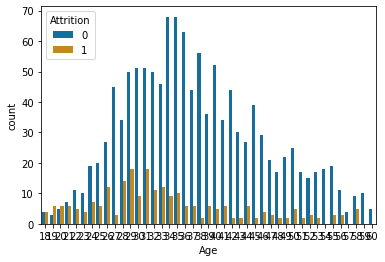

In [15]:
sns.countplot( data = data, x = 'Age', hue='Attrition',palette='colorblind')

<AxesSubplot:>

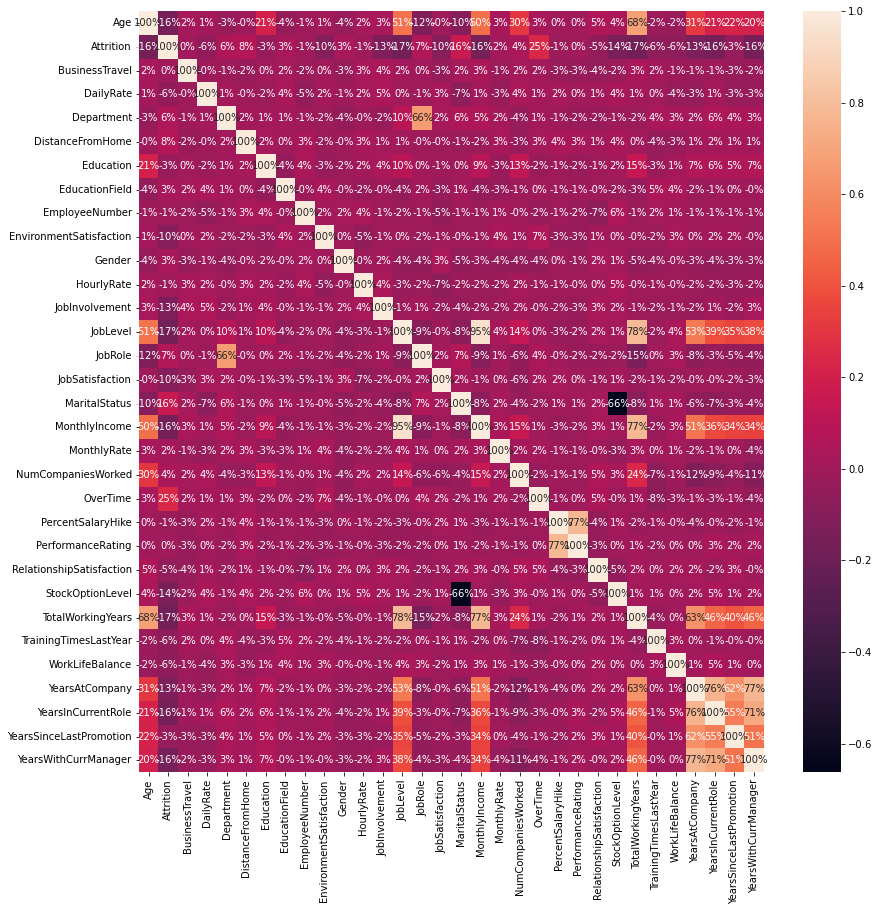

In [16]:
# ver a correlação dos dados
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, fmt='0.0%')

# ML-Clustering/Unsupervising

#Kmeans

In [113]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\lanur\AppData\Local\Temp\ipykernel_14712\360305055.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [18]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
data[['Age_T', 'Attrition_T', 'BusinessTravel_T', 'DailyRate_T', 'Department_T',
       'DistanceFromHome_T', 'Education_T', 'EducationField_T', 'EmployeeNumber_T',
       'EnvironmentSatisfaction_T', 'Gender_T', 'HourlyRate_T', 'JobInvolvement_T',
       'JobLevel_T', 'JobRole_T', 'JobSatisfaction_T', 'MaritalStatus_T',
       'MonthlyIncome_T', 'MonthlyRate_T', 'NumCompaniesWorked_T', 'OverTime_T',
       'PercentSalaryHike_T', 'PerformanceRating_T', 'RelationshipSatisfaction_T',
       'StockOptionLevel_T', 'TotalWorkingYears_T', 'TrainingTimesLastYear_T',
       'WorkLifeBalance_T', 'YearsAtCompany_T', 'YearsInCurrentRole_T',
       'YearsSinceLastPromotion_T', 'YearsWithCurrManager_T']]=scaler.fit_transform(data[['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']])

c:\Users\lanur\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


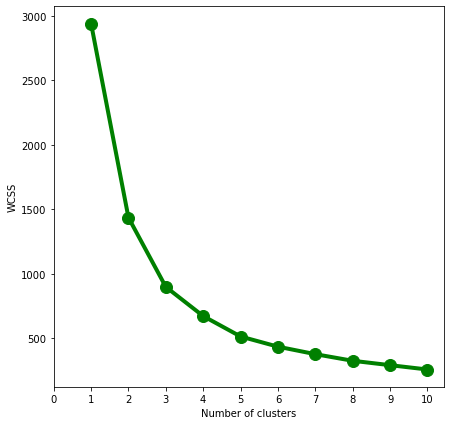

In [21]:
# find the optimal number of clusters using elbow method
from sklearn.cluster import KMeans
x = data.loc[:,['Age_T','MonthlyIncome_T']].values
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [22]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)

In [23]:
kmeans.fit(data[['Age_T','MonthlyIncome_T']])

KMeans(n_clusters=4)

In [24]:
data['kmeans_4']=kmeans.labels_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


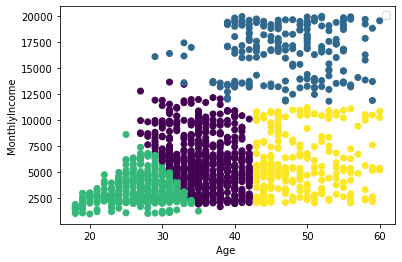

In [25]:
plt.scatter(x=data['Age'],y=data['MonthlyIncome'],c=data['kmeans_4'])
plt.xlabel("Age ")
plt.ylabel("MonthlyIncome")
plt.legend()
plt.show()

# ML-Modelo Preditivo



In [182]:
#pip install xgboost

     -------------------------------------- 125.4/125.4 MB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [183]:
#pip install catboost

     ---------------------------------------- 74.0/74.0 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [184]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [144]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [145]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [146]:
df = df.drop(columns = ['EmployeeNumber','Over18','StandardHours'])

In [147]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [148]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

df.head()

C:\Users\lanur\AppData\Local\Temp\ipykernel_14712\4204384967.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2


## Split de data

In [176]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.drop('Attrition', axis=1)
y = df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Scale fit do DF para treino

In [178]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.958919,0.587850,-0.398372,-0.500989,-0.036578,-0.866067,-0.941395,0.0,0.270496,0.828785,-0.547908,0.37805,-0.998363,0.636294,-1.538894,1.248121,-1.205478,-0.991931,-0.689111,-0.644520,2.691496,2.339166,0.234944,-0.935308,-1.343806,1.015228,0.335827,-1.005429,-0.902661,-0.679685,-1.168838
1,-0.430695,0.587850,1.171346,-0.500989,0.699024,-1.835797,0.536401,0.0,-0.651162,0.828785,-0.449557,0.37805,0.846010,-0.577698,0.264662,-0.128424,1.374736,1.429972,1.714602,1.551543,-0.877511,-0.427503,1.154171,-0.935308,0.478720,-0.598161,1.734881,0.012531,0.493249,1.493316,0.812136
2,1.643324,0.587850,1.295482,-0.500989,0.208623,1.073395,-0.941395,0.0,1.192155,-1.206585,0.829007,0.37805,-0.076177,-0.982362,0.264662,-0.128424,-0.812328,1.021141,2.115221,-0.644520,1.318801,2.339166,-0.684284,0.247041,-0.302363,0.208533,0.335827,-0.326789,-0.623479,-0.369256,-0.036853
3,-1.085648,-0.891117,-0.542530,-0.500989,-0.894779,0.103664,0.536401,0.0,1.192155,0.828785,1.074884,0.37805,-0.998363,0.636294,1.166440,1.248121,-1.176838,-1.106690,-0.288492,-0.644520,-0.602972,-0.427503,0.234944,-0.935308,-0.692904,-2.211550,-1.063226,-0.496449,-0.623479,-0.369256,-0.602845
4,-0.321536,-0.891117,-1.279336,1.387354,-0.894779,1.073395,-0.202497,0.0,0.270496,-1.206585,0.484778,0.37805,-0.998363,1.445622,0.264662,-0.128424,-1.471050,-0.422915,1.313983,-0.644520,0.769723,-0.427503,1.154171,0.247041,-0.692904,0.208533,0.335827,-0.496449,-0.344297,-0.369256,-0.602845


In [179]:
## Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

NameError: name 'evaluate' is not defined

## Random Forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=50, bootstrap=False)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

## SVM

In [ ]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

## XGBoost

In [ ]:
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
                           max_delta_step=0, max_depth=5, min_child_weight=7,
                           n_estimators=200, n_jobs=-1, nthread=None,
                           objective='binary:logistic', random_state=0, reg_alpha=0,
                           reg_lambda=1, scale_pos_weight=1, seed=None,
                           subsample=0.6)
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

## CatBoost

In [ ]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

### Importância de variáveis e peso no Attrition do funcionário

In [192]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
TotalWorkingYears,0.089
MonthlyIncome,0.086
MonthlyRate,0.061
NumCompaniesWorked,0.056
YearsAtCompany,0.053
DailyRate,0.051
DistanceFromHome,0.050
HourlyRate,0.049
YearsWithCurrManager,0.040


- Esta são as variáveis que influenciam a saída do funcionário. Agora é definir a escala da variável. Por exemplo, se o MonthlyIncome aumentar, Attrition diminui. Se DistanceFromHome diminuir, Attrition diminui

<AxesSubplot:xlabel='feature'>

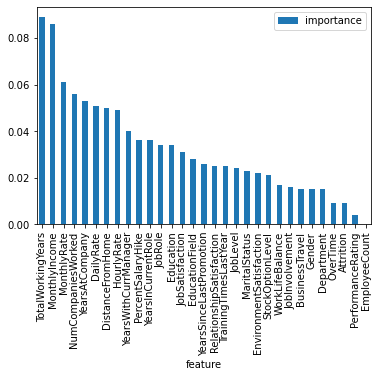

In [172]:
#Visualize the importance
importances.plot.bar()

### Gráficos explicativos relacionados às variáveis importantes

# Teste com outros modelos supervisionados

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [ ]:
for a,b in zip([lr,dt,knn,rm,gnb],["Logistic Regression","Decision Tree","KNN","Random Forest","Naive Bayes"]):
    a.fit(X_train,Y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(Y_train,prediction)
    score=accuracy_score(Y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.217786
[Logistic Regression] test data accuracy is : 0.057065
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.043478
[KNN] training data accuracy is : 0.380218
[KNN] test data accuracy is : 0.032609
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.097826
[Naive Bayes] training data accuracy is : 0.183303
[Naive Bayes] test data accuracy is : 0.059783


In [ ]:
model_scores={'Logistic Regression':lr.score(X_test,Y_test),
             'KNN classifier':knn.score(X_test,Y_test),
             
             'Random forest':rm.score(X_test,Y_test),
              'Decision tree':dt.score(X_test,Y_test),
              'Naive Bayes':gnb.score(X_test,Y_test)
             }
model_scores

{'Logistic Regression': 0.057065217391304345,
 'KNN classifier': 0.03260869565217391,
 'Random forest': 0.09782608695652174,
 'Decision tree': 0.043478260869565216,
 'Naive Bayes': 0.059782608695652176}

In [ ]:
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(Y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.25      0.50      0.33         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         7
           7       0.33      0.17      0.22        12
           8       0.07      0.14      0.10         7
           9       0.13      0.14      0.14        14
          10       0.04      0.11      0.06         9
          11       0.04      0.06      0.05        16
          12       0.11      0.18      0.13        11
          13       0.12      0.09      0.10        23
          14       0.20      0.31      0.24        16
          15       0.00      0.00      0.00        12
          16       0.10      0.07      0.09        27
          17       0.06    

c:\Users\lanur\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lanur\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lanur\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

lr_y_preds = lr.predict(X_test)

print(classification_report(Y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.33      0.40         3
           2       0.00      0.00      0.00         2
           3       0.25      0.50      0.33         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.33      0.14      0.20         7
           7       0.00      0.00      0.00        12
           8       0.09      0.14      0.11         7
           9       0.00      0.00      0.00        14
          10       0.25      0.22      0.24         9
          11       0.09      0.19      0.12        16
          12       0.00      0.00      0.00        11
          13       0.12      0.09      0.10        23
          14       0.06      0.06      0.06        16
          15       0.00      0.00      0.00        12
          16       0.06      0.04      0.05        27
          17       0.07    

c:\Users\lanur\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lanur\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lanur\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Random forest,Decision tree,Naive Bayes
accuracy,0.057065,0.032609,0.097826,0.043478,0.059783


## Feature Importance

### Logistic Regression

In [ ]:
feature_dict=dict(zip(df.columns,list(lr.coef_[0])))
feature_dict

{'Age': 0.0516997065525247,
 'Attrition': -0.16269246111411828,
 'BusinessTravel': -0.0017109348217572463,
 'DailyRate': 0.0828730957111358,
 'Department': -0.1326431707651645,
 'DistanceFromHome': -0.01131444547638742,
 'Education': -0.006939274733393366,
 'EducationField': 0.0,
 'EmployeeCount': 0.07524293384965833,
 'EnvironmentSatisfaction': -0.0059588518462555026,
 'Gender': 0.037333688293560104,
 'HourlyRate': 0.10401406722586166,
 'JobInvolvement': -6.80421100253428e-05,
 'JobLevel': 0.05531482692926155,
 'JobRole': 0.07674999941188719,
 'JobSatisfaction': 0.19935024025766385,
 'MaritalStatus': -0.04390418136004355,
 'MonthlyIncome': -0.0008271442215299976,
 'MonthlyRate': 0.005068482117758193,
 'NumCompaniesWorked': 0.07087465657325182,
 'OverTime': -0.1512774653825674,
 'PercentSalaryHike': -0.03466567088997279,
 'PerformanceRating': 0.1319224959353025,
 'RelationshipSatisfaction': -0.17542534474780758,
 'StockOptionLevel': -0.32761134460421987,
 'TotalWorkingYears': -0.202749

<AxesSubplot:title={'center':'Feature Importance'}>

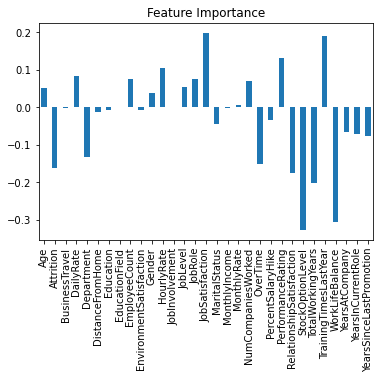

In [ ]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")